In [1]:
import sys
sys.path.append('..')
sys.path.append('../SpectralMechanicsAnalysis')
from SpectralMechanicsAnalysis import mean_back_realxation
from SpectralMechanicsAnalysis.simulations import simulate_trajectory
from SpectralMechanicsAnalysis.models import G_Maxwell, G_Kelvin_Voigt, G_fractional_Kelvin_Voigt, PSD
#from analyze_data import Laplace_NLL
import matplotlib.pyplot as plt
import numpy as np
from SpectralMechanicsAnalysis.data_handeling import Data
from SpectralMechanicsAnalysis.data_handeling import load_data
from SpectralMechanicsAnalysis.analyze_data import get_peak_indices

In [2]:
#x_data = np.load("../data/Hydrogel_25_khz_x.npy")[0:100000]
x_data = np.load("../data/tweezeramplitude_000_x_66_kHz.npy")[0:100000]
#make t-data under the assumption that measurements are taken at 1 kHz
t_data = np.linspace(0, len(x_data)/25000, len(x_data))

print(x_data.shape)

(100000,)


In [4]:
data = Data(t_data, x_data, typical_peak_number=1, max_peak_percentage=.8, log_weighted=False, unweighted_postfit = False)
data.create_PSD()
data.bayesian_update()

In [5]:
from SpectralMechanicsAnalysis.analyze_data import get_peak_indices
import copy
surpirse = copy.deepcopy(data.suprise)
peaks = copy.deepcopy(data.peaks)
prior = 0


peak_ineces = get_peak_indices(peaks)
sup = copy.deepcopy(surpirse) - prior
sup[peak_ineces] = -sup[peak_ineces]

In [6]:
data.peaks = []
data.find_peaks(max_iter=5)

IndexError: list index out of range

In [118]:
data.create_reconstructed_data()

In [119]:
#data.save("../data/tweezeramplitude_000_x_66_kHz_fitted")

In [120]:
#data = load_data("../data/tweezeramplitude_000_x_66_kHz_fitted")

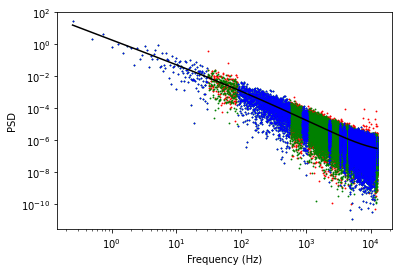

In [122]:
frequencies = data.frequencies
PSD = data.PSD
peak_idx = get_peak_indices(data.peaks)
non_peak_idx = np.setdiff1d(np.arange(len(frequencies)), peak_idx)
plt.scatter(frequencies[peak_idx], PSD[peak_idx], s=.7,c='r')
plt.scatter(frequencies, data.reconstructed_PSD, c='g', s=.7)
plt.scatter(frequencies[non_peak_idx], PSD[non_peak_idx], s=.5,c='b', label='Hydrogel 1 kHz')

plt.plot(frequencies, data.fit_function(frequencies, data.fit_params), c='k')


plt.xscale('log')
plt.yscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")
plt.show()

In [8]:
dt = 1/1000
Tau = dt
T = 1
mbr = mean_back_realxation(dt,data.reconstructed_x, Tau, T)
t_mbr = np.linspace(0, len(mbr)*dt, len(mbr))

  0%|          | 0/201945 [00:00<?, ?it/s]

100%|██████████| 201945/201945 [00:00<00:00, 211238.94it/s]


In [9]:
longtime_MBR = np.mean(mbr[int(len(mbr)/2):])

In [12]:

def E_0_over_kb_T(longtime_MBR):
    return longtime_MBR*(-96.575)+46.93
E_0 =E_0_over_kb_T(longtime_MBR)

Text(0, 0.5, 'Mean back relaxation')

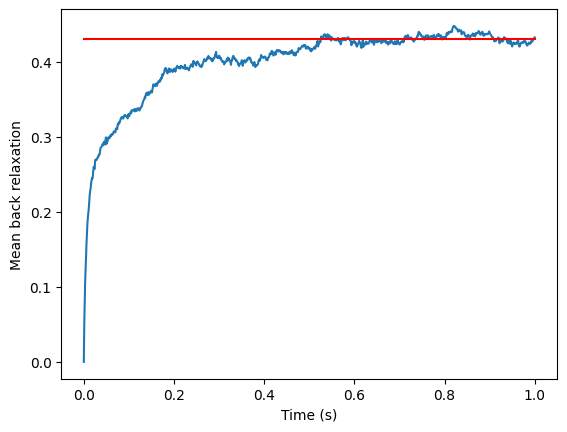

In [11]:
plt.plot(t_mbr, mbr)
plt.plot(t_mbr, np.ones(len(mbr))*longtime_MBR, c='r')
plt.xlabel("Time (s)")
plt.ylabel("Mean back relaxation")


In [21]:
data.log_weighted = False
data.create_activity_filtered_PSD(E_0)

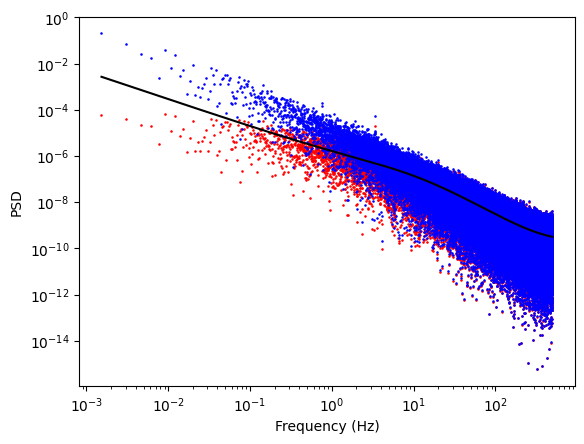

In [25]:
frequencies = data.frequencies
PSD = data.activity_filtered_PSD
#peak_idx = get_peak_indices(data.peaks)
#non_peak_idx = np.setdiff1d(np.arange(len(frequencies)), peak_idx)
plt.scatter(frequencies, PSD, s=.7,c='r')
#plt.scatter(frequencies, data.reconstructed_PSD, c='b', s=.7)

plt.plot(frequencies, data.fit_function(frequencies, data.activity_filtered_fit_params), c='k')


plt.xscale('log')
plt.yscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")
plt.show()

In [23]:
kb_T = 293
for params in [data.fit_params, data.activity_filtered_fit_params]:
    A_T,B_T,alpha,beta,sigma = params
    print(f"A = {A_T/kb_T:.2f}")
    print(f"B = {B_T/kb_T:.2f}")
    print(f"alpha = {alpha:.2f}")
    print(f"beta = {beta:.2f}")
    print(f"sigma = {sigma:.2f}")

A = 396.84
B = 191.96
alpha = 0.50
beta = 1.00
sigma = 0.00
A = 1611.86
B = 225.68
alpha = 0.19
beta = 0.99
sigma = 0.00
